# Scraping LinkedIn Jobs

how to build a web scraper that doesn’t infringe any privacy policies or required a headless browser to access any data behind a login wall.

# Objectives
*  extract the job title, company hiring, location, and the link to the job listing using Requests and Beautiful Soup
* export the data to a CSV file for later analysis or use.

## Understand LinkedIn’s Site Structure

Go to LinkedIn website and do a job search page for AI in Oman.

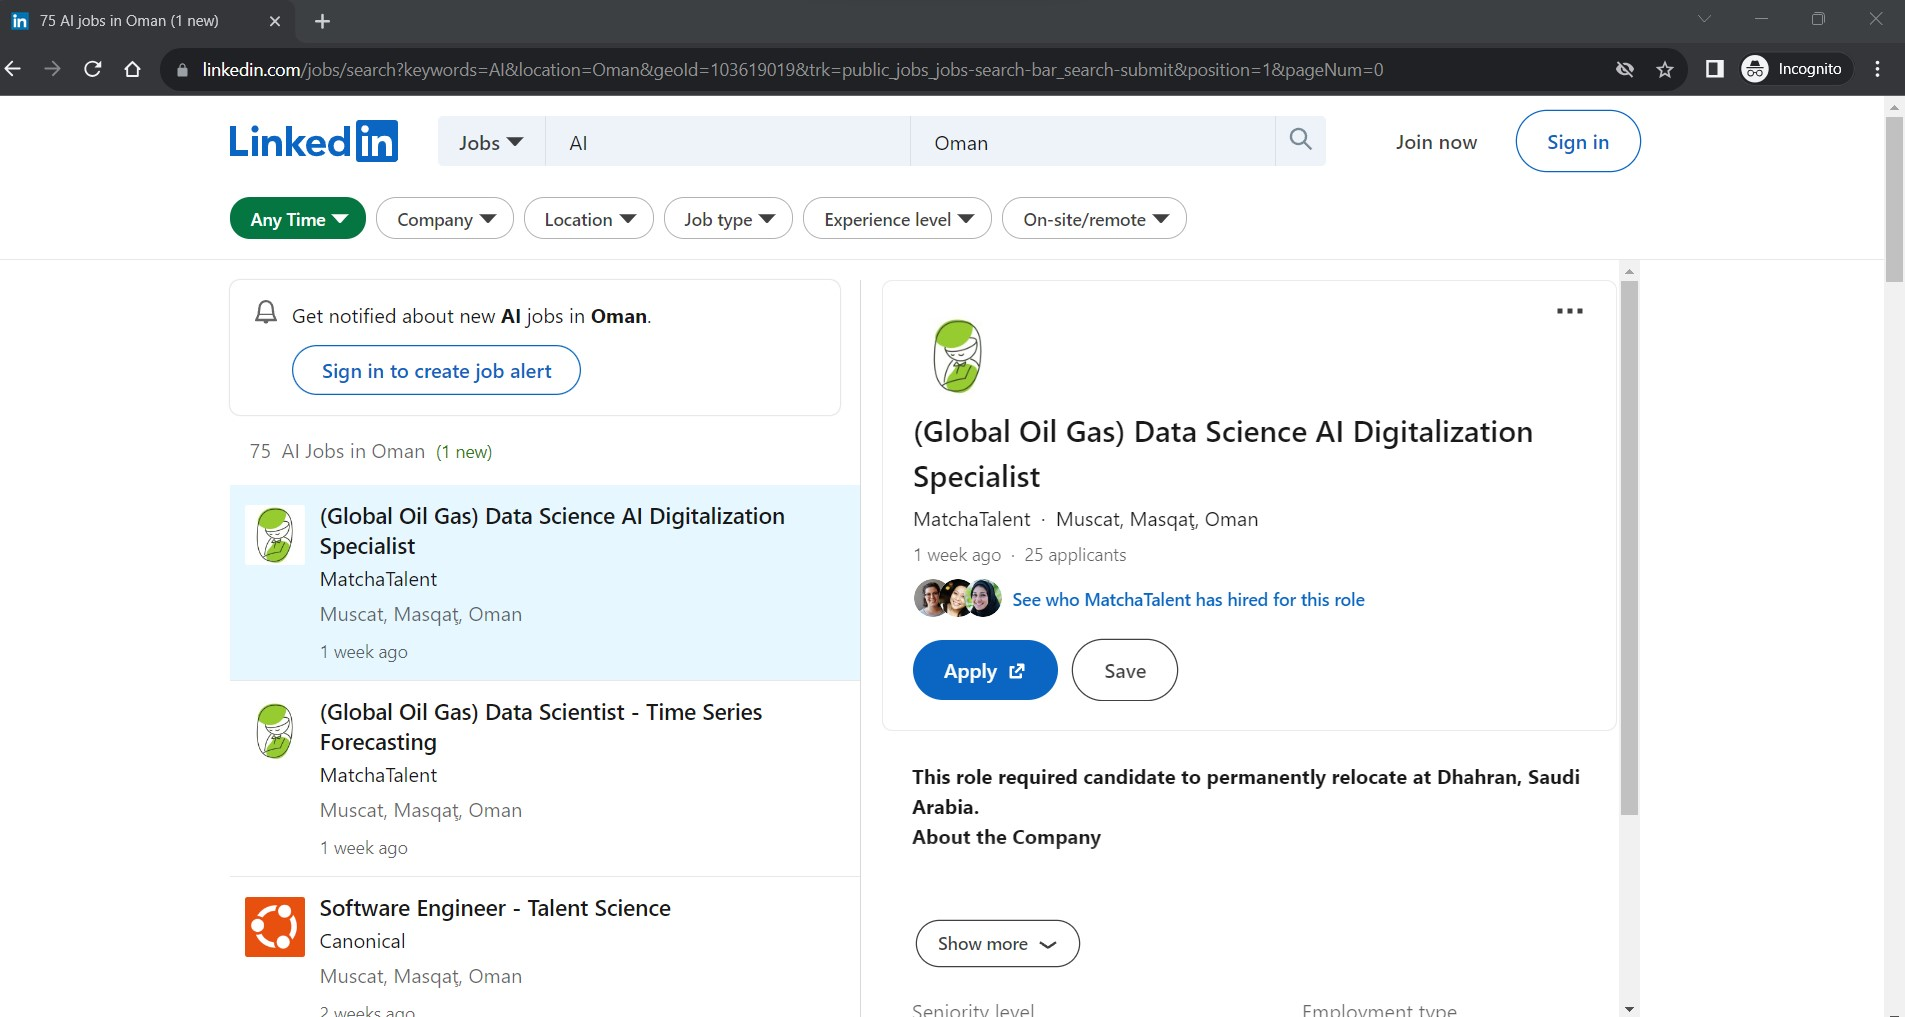

It seems that each job is listed in card-like container

## Inspect LinkedIN job page structure

Open DevTools in chrome. Hover on first job, right click and select inspect to highlight the job div html.

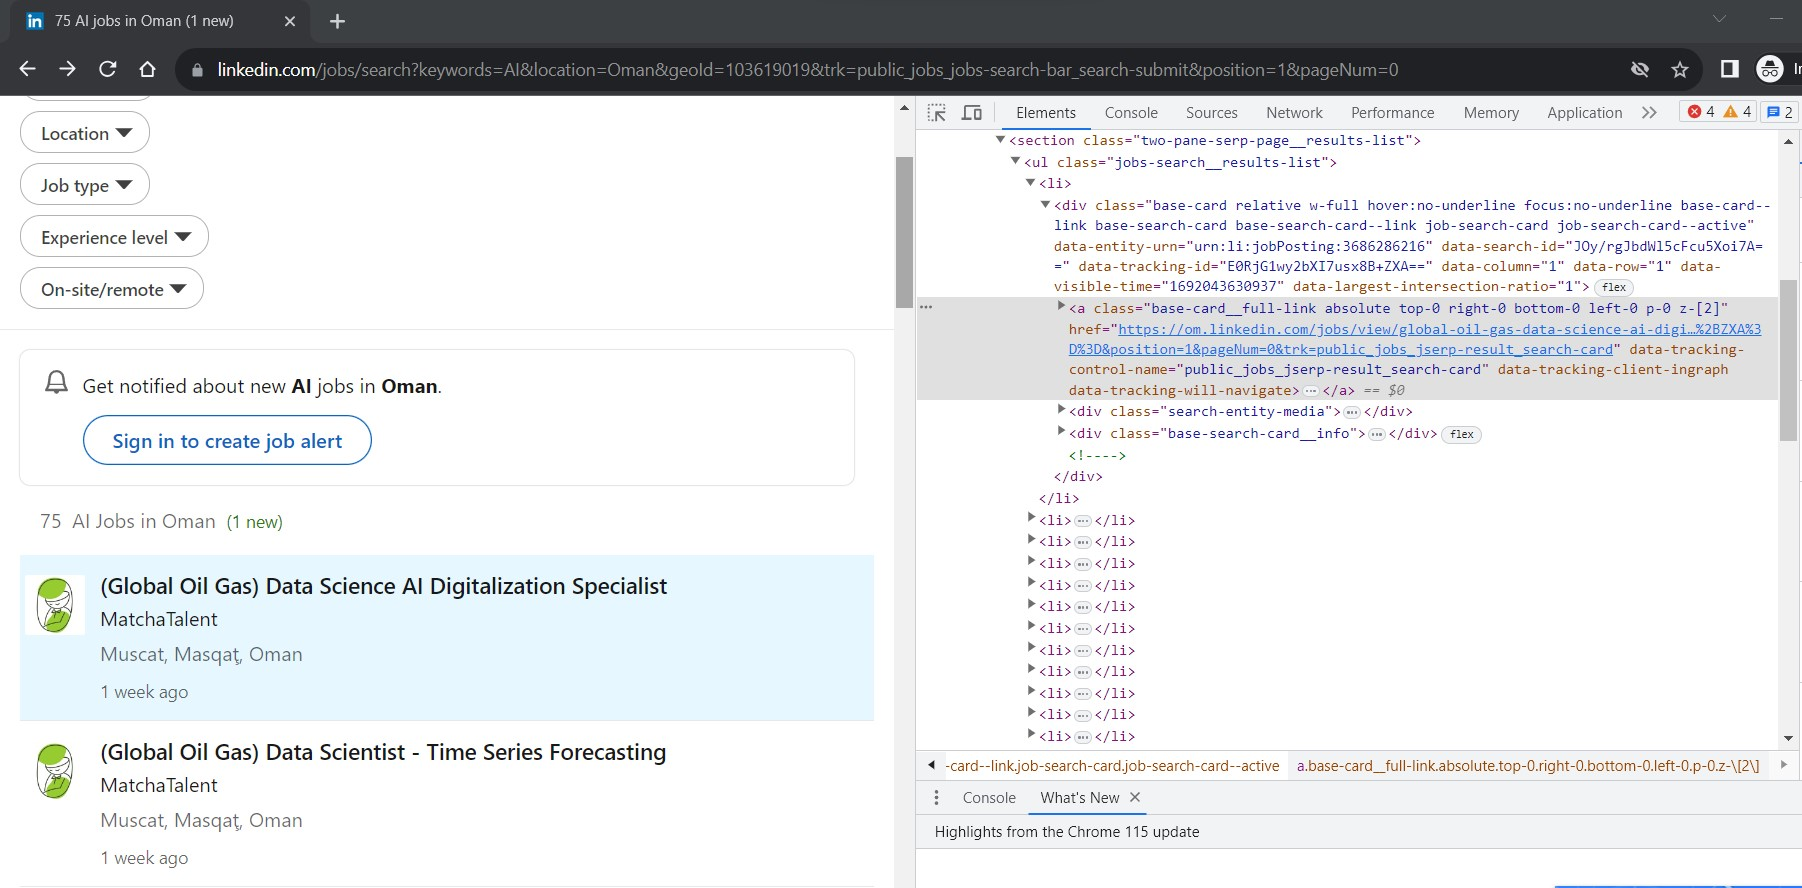

to access new jobs, LinkedIn uses infinite scrolling pagination, which means there is no “next page” button to grab the next page URL link from nor the URL itself changes.

by using the Network Tab inside DevTools. we maybe able to fins out how to scroll the page from inside python http request.


To populate the report, just reload the page and you’ll be able to see all the fetch requests the browser is running to render the data on the page. After scrolling to the bottom, the browser sends a new request to the URL in the screenshot below.

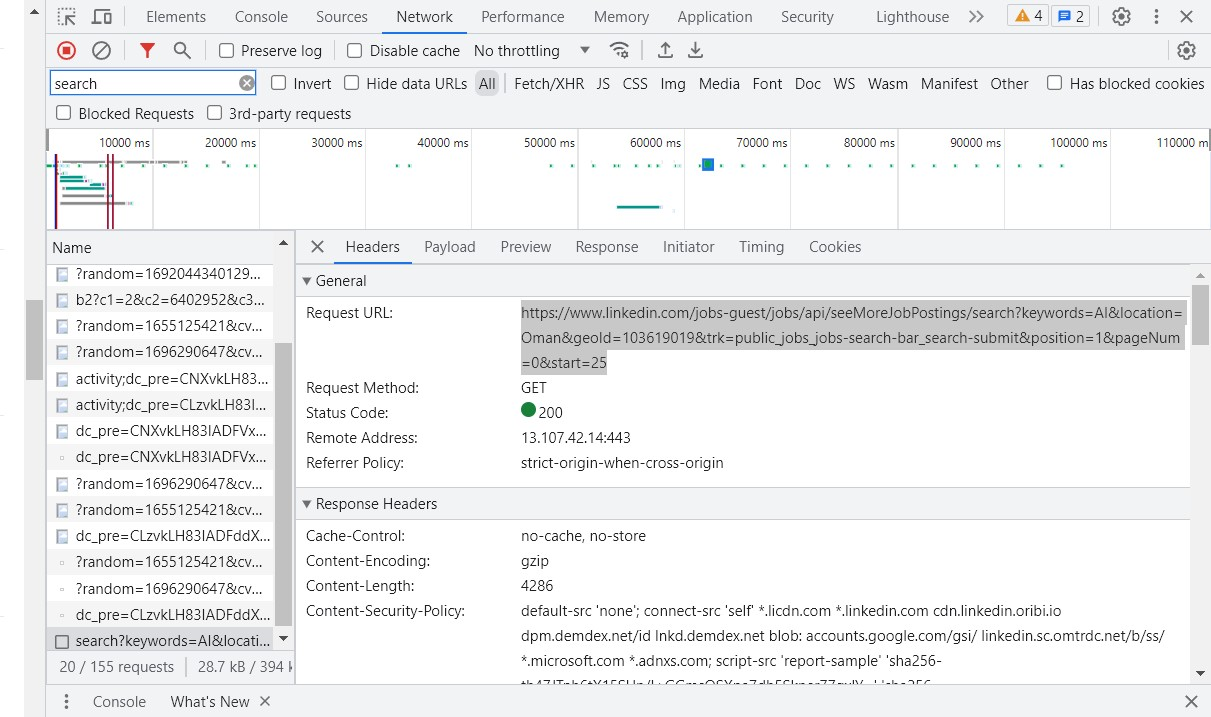

Let’s try this new URL in our browser to see where it takes us:

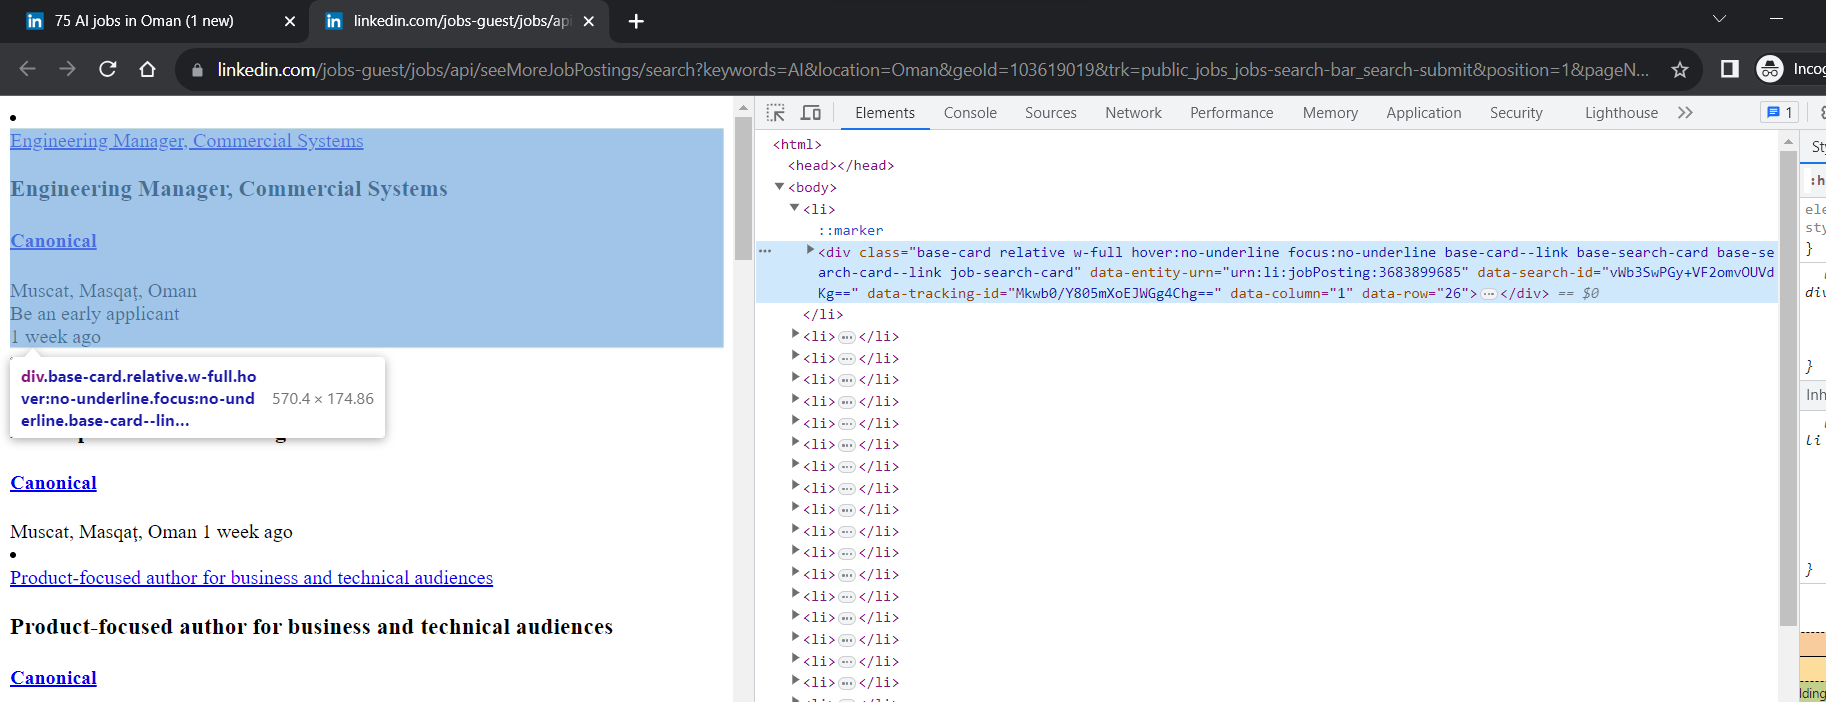

This page has all the information we want right there for the grabbing. An additional finding is that this URL has a structure we can actually manipulate really easily. Just by changing the value in the start parameter, we can access the new data.

In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
import time
import csv
import requests
from bs4 import BeautifulSoup

# any comment



create a variable containing our initial URL and pass it to the requests.get() method. Then, we’ll store the returned HTML in a variable called “response” to create our Python object

In [ ]:
webpage= 'https://www.linkedin.com/jobs/search?keywords=AI&location=Oman&geoId=103619019&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'

In [ ]:
file = open('linkedin-jobs.csv', 'a')
writer = csv.writer(file)
writer.writerow(['Title', 'Company', 'Location', 'Apply'])

def linkedin_scraper(webpage, start=0):
  if start> 0:
    next_page = webpage + '&start={}'.format(start)
  else:
    next_page = webpage
  print(str(next_page))
  response = requests.get(str(next_page))
  soup = BeautifulSoup(response.content,'html.parser')

  jobs = soup.find_all('div', class_='base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card')
  for job in jobs:
    job_title = job.find('h3', class_='base-search-card__title').text.strip()
    job_company = job.find('h4', class_='base-search-card__subtitle').text.strip()
    job_location = job.find('span', class_='job-search-card__location').text.strip()
    job_link = job.find('a', class_='base-card__full-link')['href']

    writer.writerow([
    job_title.encode('utf-8'),
    job_company.encode('utf-8'),
    job_location.encode('utf-8'),
    job_link.encode('utf-8')
    ])

  print(job_title)
  print('Data updated')





In [ ]:
for i in range(5):
  linkedin_scraper(webpage, i*25)
  # be polite with the website to avoid banning
  time.sleep(3)
file.close()
print('File closed')

https://www.linkedin.com/jobs/search?keywords=AI&location=Oman&geoId=103619019&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0
Graduate Linux System Engineer - QA, Tooling, Automation
Data updated
https://www.linkedin.com/jobs/search?keywords=AI&location=Oman&geoId=103619019&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=25
Graduate Linux System Engineer - QA, Tooling, Automation
Data updated
https://www.linkedin.com/jobs/search?keywords=AI&location=Oman&geoId=103619019&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=50
Graduate Linux System Engineer - QA, Tooling, Automation
Data updated
https://www.linkedin.com/jobs/search?keywords=AI&location=Oman&geoId=103619019&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=75
Graduate Linux System Engineer - QA, Tooling, Automation
Data updated
https://www.linkedin.com/jobs/search?keywords=AI&location=Oman&geoId=103619019&trk=public_jobs_jobs-search-ba